In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
%matplotlib inline

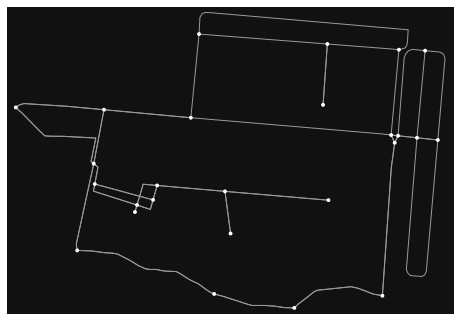

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [17]:
import osmnx as ox
G= ox.graph_from_place('FEUP, Porto')
ox.plot_graph(G)

In [18]:
mapping=dict(zip(G, range(0, 2000)))
graph = nx.relabel_nodes(G, mapping, copy="True")
nx.nodes(graph)

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25))

<function matplotlib.pyplot.show(close=None, block=None)>

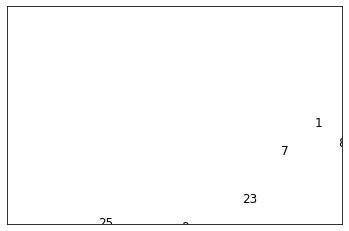

In [19]:
pos = nx.spring_layout(graph)
nx.draw_networkx_labels(graph, pos)
plt.show

In [20]:
# initialize Reward and Q matrix:
R = np.matrix(np.zeros(shape=(26,26)))
for x in graph:
    R[x,25] = 100

Q = np.matrix(np.zeros(shape= (26,26)))
Q -= 100
for node in graph.nodes:
    for x in graph[node]:
        Q[node, x] = 0
        Q[x, node] = 0

In [21]:
import pandas as pd
pd.DataFrame(R)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


In [22]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0
1,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
2,-100.0,-100.0,-100.0,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,0.0,-100.0,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0
4,-100.0,-100.0,-100.0,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,-100.0,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,0.0
7,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0
8,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0
9,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,0.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0


In [23]:
def next_number (start, er):
    random_number = random.uniform(0,1) # choose a random number 0 and 1
    if random_number < er:   # if the random number is less than threshold, it chooses next action randomly
        sample = graph[start]
    else:
        sample = np.where(Q[start,] == np.max(Q[start, ]))[1]
    next_node = int(np.random.choice(sample, 1))
    return next_node

In [24]:
def updateQ (node1, node2, lr, discount):
    max_index = np.where(Q[node2,] == np.max(Q[node2,]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    
    max_value = Q[node2, max_index]
    Q[node1, node2] = int((1-lr)*Q[node1, node2] + lr*(R[node1, node2] + discount* max_value))

In [25]:
def learn(er, lr, discount):
    for i in range(5000):
        start = np.random.randint(0,25)
        next_node = next_number(start, er)
        updateQ(start, next_node, lr, discount)
        
learn(.1, 0.8, 0.9)

In [26]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-100.0,-100.0,-100.0,78.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,78.0,-100.0,99.0
1,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,69.0,61.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
2,-100.0,-100.0,-100.0,78.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,88.0,-100.0,0.0,-100.0,69.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,78.0,-100.0,-100.0
4,-100.0,-100.0,-100.0,78.0,-100.0,61.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,54.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,-100.0,69.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,78.0,99.0
7,-100.0,61.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,78.0,-100.0,-100.0
8,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,69.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0
9,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,54.0,48.0,42.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0


In [27]:
def shortest_path(begin, end):
    path = [begin]
    next_node = np.argmax(Q[begin,])
    path.append(next_node)
    while next_node != end:
        next_node = np.argmax(Q[next_node,])
        path.append(next_node)
    return path
    

In [28]:
shortest_path(5,25)

[5, 2, 3, 0, 25]